# Comparison of RFM scores
In this notebook we compare the RFM scores extracted from jupyter notebooks ***03a.rfm_scores_via_percentiles*** and ***03b.rfm_scores_via_kmeans***.

In [932]:
# Import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib ipympl

In [933]:
# Import RFM scores via percentiles
rfm_scores_percentiles = pd.read_csv(r'C:\Users\argyr\OneDrive\Υπολογιστής\Diplvm\Giftware dataset\rfm_scores_via_percentiles.csv')
rfm_scores_percentiles.head(10)

,Customer ID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score
0,12346,432.0,34.0,368.36,1,2,2,122
1,12347,3.0,222.0,4921.53,5,5,5,555
2,12348,76.0,51.0,2019.40,3,3,4,334
3,12349,19.0,179.0,4419.49,5,4,5,545
4,12350,311.0,17.0,334.40,2,1,2,212
5,12351,376.0,21.0,300.93,2,2,2,222
6,12352,37.0,107.0,1889.21,4,4,4,444
7,12353,205.0,24.0,406.76,2,2,2,222
8,12354,233.0,58.0,1079.40,2,3,3,233
9,12355,215.0,35.0,947.61,2,2,3,223


In [934]:
print(rfm_scores_percentiles["RFM_Score"].nunique())

115


In [935]:
# number of customers with rfmscore=555
(rfm_scores_percentiles["RFM_Score"]==555).sum()

434

In [936]:
# Import RFM scores via k-means
rfm_scores_kmeans = pd.read_csv(r'C:\Users\argyr\OneDrive\Υπολογιστής\Diplvm\Giftware dataset\rfm_scores_via_kmeans.csv')
rfm_scores_kmeans.head(10)

,Customer ID,Recency,Frequency,Monetary,Recency_clustered,Frequency_clustered,Monetary_clustered,score
0,12346,432.0,34.0,368.36,2,1,1,211
1,12347,3.0,222.0,4921.53,5,2,1,521
2,12348,76.0,51.0,2019.40,5,1,1,511
3,12349,19.0,179.0,4419.49,5,1,1,511
4,12350,311.0,17.0,334.40,3,1,1,311
5,12351,376.0,21.0,300.93,2,1,1,211
6,12352,37.0,107.0,1889.21,5,1,1,511
7,12353,205.0,24.0,406.76,3,1,1,311
8,12354,233.0,58.0,1079.40,3,1,1,311
9,12355,215.0,35.0,947.61,3,1,1,311


In [937]:
print(rfm_scores_kmeans["score"].nunique())

40


In [938]:
# Keep only Customer ID and score from both dataframes
rfm_sc_perc = rfm_scores_percentiles.copy()
rfm_sc_perc = rfm_sc_perc[["Customer ID", "Recency", "Frequency", "Monetary", "RFM_Score"]]
rfm_sc_perc.rename(columns={'RFM_Score': 'score'}, inplace=True)

rfm_sc_km = rfm_scores_kmeans.copy()
rfm_sc_km = rfm_sc_km[["Customer ID", "Recency", "Frequency", "Monetary", "score"]]

In [939]:
# There are 11 segments in total
champions = [555, 554, 544, 545, 454, 455, 445]
loyal = [543, 444, 435, 355, 354, 345, 344, 335]
potential_loyalist = [553, 551, 552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 
                      352, 351, 342, 341, 333, 323]
new_customers = [512, 511, 422, 421, 412, 411, 311]
promising = [525, 524, 523, 522, 521, 515, 514, 513, 425, 424, 413, 414, 415, 315, 314, 313]
need_attention = [535, 534, 443, 434, 343, 334, 325, 324]
about_to_sleep = [331, 321, 312, 221, 213, 231, 241, 251]
cannot_lose_them_but_losing = [155, 154, 144, 214, 215, 115, 114, 113]
at_risk = [255, 254, 245, 244, 253, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124]
hibernating = [332, 322, 233, 232, 223, 222, 132, 123, 122, 212, 211]
lost = [111, 112, 121, 131, 141, 151]

segments_names = ["champions","loyal","potential_loyalist","new_customers","promising","need_attention","about_to_sleep",
                  "cannot_lose_them_but_losing","at_risk","hibernating","lost"]

segments = [champions,loyal,potential_loyalist,new_customers,promising,need_attention,about_to_sleep,
            cannot_lose_them_but_losing,at_risk,hibernating,lost] 

In [940]:
# Map customer score to segment id
def customers_segments_from_score(score, segments):
    for idx, inner_list in enumerate(segments):
            if score in inner_list:
                return idx
    return None  
    
# Apply the function to create a new column in the DataFrame
rfm_sc_perc['segment id'] = rfm_sc_perc['score'].apply(lambda x: customers_segments_from_score(x, segments))
rfm_sc_km['segment id'] = rfm_sc_km['score'].apply(lambda x: customers_segments_from_score(x, segments))

In [941]:
rfm_sc_perc.head()

,Customer ID,Recency,Frequency,Monetary,score,segment id
0,12346,432.0,34.0,368.36,122,9
1,12347,3.0,222.0,4921.53,555,0
2,12348,76.0,51.0,2019.40,334,5
3,12349,19.0,179.0,4419.49,545,0
4,12350,311.0,17.0,334.40,212,9


In [942]:
rfm_sc_km.head()

,Customer ID,Recency,Frequency,Monetary,score,segment id
0,12346,432.0,34.0,368.36,211,9
1,12347,3.0,222.0,4921.53,521,4
2,12348,76.0,51.0,2019.40,511,3
3,12349,19.0,179.0,4419.49,511,3
4,12350,311.0,17.0,334.40,311,3


In [943]:
# How many customers are there in each segment? (1st method)
occurrences = rfm_sc_perc['segment id'].value_counts().sort_index().to_dict()
print(occurrences)

{0: 1112, 1: 623, 2: 644, 3: 397, 4: 206, 5: 300, 6: 207, 7: 107, 8: 519, 9: 1133, 10: 600}


In [944]:
# 2nd method
occurrences = rfm_sc_km['segment id'].value_counts().sort_index().to_dict()
print(occurrences)

{0: 3, 1: 4, 2: 129, 3: 3358, 4: 683, 5: 3, 6: 63, 9: 1005, 10: 600}


In [945]:
# 10: 600, einai oi idioi arage?
segment_10_customers_perc = pd.DataFrame(rfm_sc_perc[rfm_sc_perc['segment id'] == 10]['Customer ID']).reset_index()
segment_10_customers_km = pd.DataFrame(rfm_sc_km[rfm_sc_km['segment id'] == 10]['Customer ID']).reset_index()

(segment_10_customers_perc['Customer ID'] == segment_10_customers_km['Customer ID']).sum()


23

In [946]:
# Plot the clusters in 3D
def scatter_2segments_3d(rfm_cust_seg1,rfm_cust_seg2,cmap):
    """
    """
    fig = plt.figure(figsize=(10, 8))
    ax1 = fig.add_subplot(121, projection='3d')

    scatter1 = ax1.scatter(
        rfm_cust_seg1['Recency'], rfm_cust_seg1['Frequency'], rfm_cust_seg1['Monetary'],
        c=rfm_cust_seg1['segment id'], cmap=cmap, marker='o',
    )

    ax1.set_xlabel('Recency')
    ax1.set_ylabel('Frequency')
    ax1.set_zlabel('Monetary')
    ax1.set_title('RFM segments')

    # Add legend
    #legend1 = ax1.legend(*scatter1.legend_elements(), title="Segments via Percentiles")
    #ax1.add_artist(legend1)

    
    """
    """
    ax2 = fig.add_subplot(122, projection='3d')

    scatter2 = ax2.scatter(
        rfm_cust_seg2['Recency'], rfm_cust_seg2['Frequency'], rfm_cust_seg2['Monetary'],
        c=rfm_cust_seg2['segment id'], cmap=cmap, marker='o'
    )

    ax2.set_xlabel('Recency')
    ax2.set_ylabel('Frequency')
    ax2.set_zlabel('Monetary')
    ax2.set_title('RFM segments')

    # Add legend
    legend1 = ax1.legend(*scatter1.legend_elements(), title="Segments", loc='upper center', ncol=len(rfm_cust_seg1.columns))
    ax1.add_artist(legend1)
    

    plt.show()

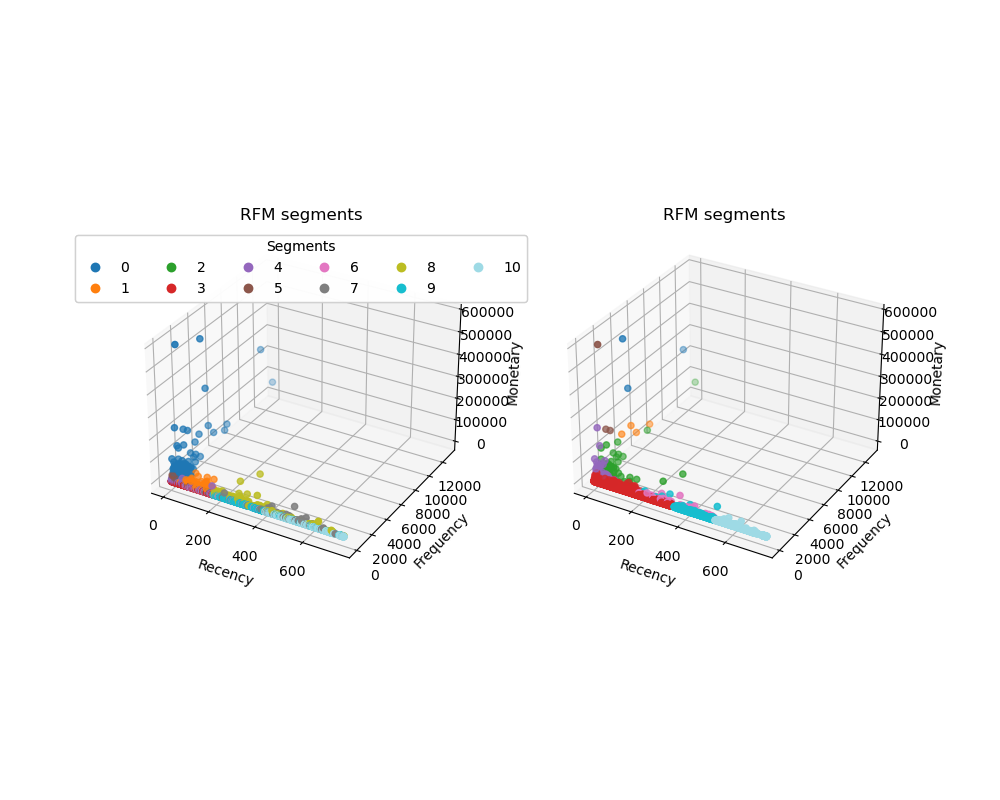

In [947]:
scatter_2segments_3d(rfm_sc_perc, rfm_sc_km, 'tab20')

In [948]:
# Plot number of customers by segment 

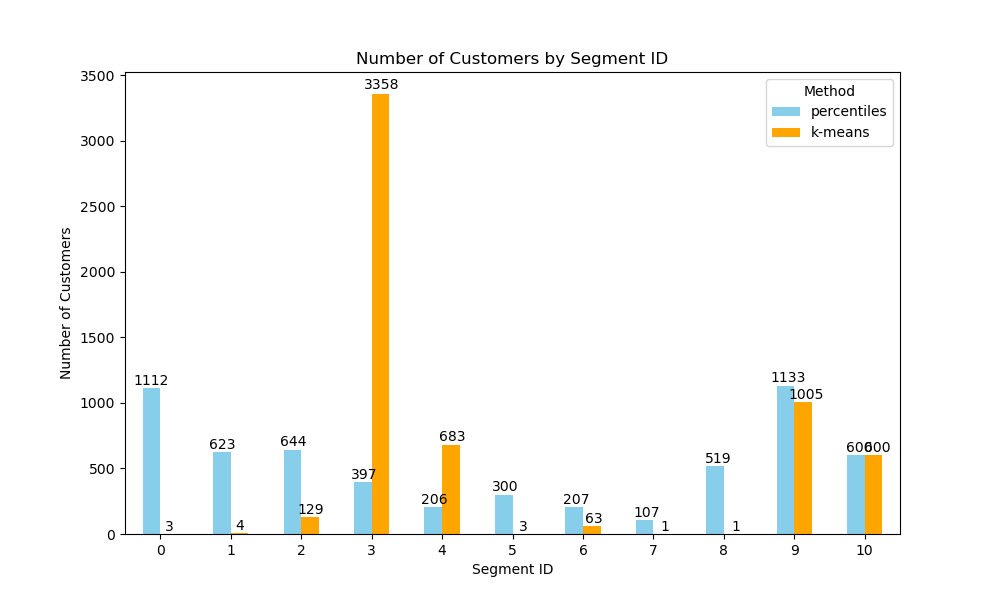

In [961]:
# Assuming df1 is your first DataFrame and df2 is your second DataFrame

# Group by 'segment id' and count unique Customer IDs in both DataFrames
customer_counts_perc = rfm_sc_perc.groupby('segment id')['Customer ID'].nunique()
customer_counts_km = rfm_sc_km.groupby('segment id')['Customer ID'].nunique()

# Combine both into a single DataFrame for comparison
comparison_df = pd.DataFrame({
    'percentiles': customer_counts_perc,
    'k-means': customer_counts_km
}).fillna(0)  # Filling NaN with 0 in case some segment ids don't appear in both DataFrames

# Plotting the grouped bar chart
ax = comparison_df.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])

# Adding labels and title
plt.title('Number of Customers by Segment ID')
plt.xlabel('Segment ID')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Method')

# Adding the value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() * 1.005 + p.get_width() / 2, p.get_height() * 1.005), 
                ha='center', va='bottom')

# Display the plot
plt.show()


In [950]:
# Avg amount spent by segment

import pandas as pd

# Assuming df_m1 and df_m2 are your DataFrames for method 1 and method 2, respectively
# Merge the DataFrames on 'segment id'
df_combined = pd.merge(rfm_sc_perc[['segment id', 'Monetary']],
                       rfm_sc_km[['segment id', 'Monetary']],
                       on='segment id', 
                       suffixes=('_m1', '_m2'))

In [951]:
# Calculate the average Monetary value for each segment
avg_monetary_m1 = rfm_sc_perc.groupby('segment id')['Monetary'].mean().reset_index()
avg_monetary_m1.rename(columns={'Monetary': 'avg_Monetary_m1'}, inplace=True)

avg_monetary_m2 = rfm_sc_km.groupby('segment id')['Monetary'].mean().reset_index()
avg_monetary_m2.rename(columns={'Monetary': 'avg_Monetary_m2'}, inplace=True)

# Merge these averages into a single DataFrame
df_avg_monetary = pd.merge(avg_monetary_m1, avg_monetary_m2, on='segment id')


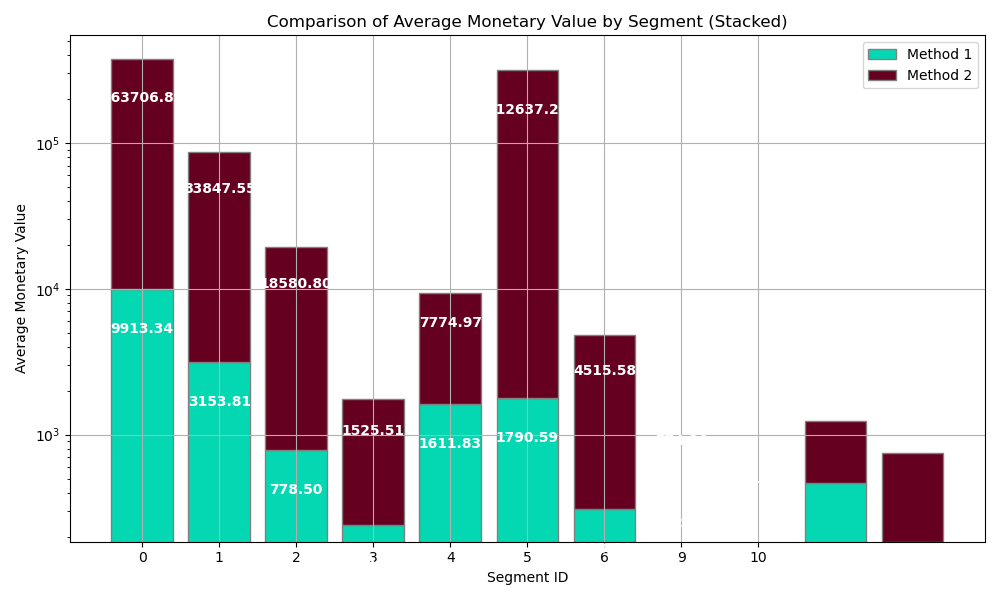

In [952]:
# Create a figure
plt.figure(figsize=(10, 6))

# Plot stacked bar chart for Method 1
plt.bar(df_avg_monetary['segment id'], df_avg_monetary['avg_Monetary_m1'], color='#04d8b2', edgecolor='grey', label='Method 1')

# Plot stacked bar chart for Method 2 on top of Method 1
plt.bar(df_avg_monetary['segment id'], df_avg_monetary['avg_Monetary_m2'], 
        bottom=df_avg_monetary['avg_Monetary_m1'], color='#650021', edgecolor='grey', label='Method 2')

# Add labels for Method 1 (at the base of the bars)
for i in range(len(df_avg_monetary)):
    plt.text(i, df_avg_monetary['avg_Monetary_m1'][i] / 2, 
             f'{df_avg_monetary["avg_Monetary_m1"][i]:.2f}', ha='center', color='white', fontweight='bold')

# Add labels for Method 2 (on top of the stacked bars)
for i in range(len(df_avg_monetary)):
    total_height = df_avg_monetary['avg_Monetary_m1'][i] + df_avg_monetary['avg_Monetary_m2'][i]
    plt.text(i, total_height - df_avg_monetary['avg_Monetary_m2'][i] / 2, 
             f'{df_avg_monetary["avg_Monetary_m2"][i]:.2f}', ha='center', color='white', fontweight='bold')

# Add labels and title
plt.xlabel('Segment ID')
plt.ylabel('Average Monetary Value')
plt.title('Comparison of Average Monetary Value by Segment (Stacked)')
plt.yscale('log')

# Customize x-axis tick labels
plt.xticks(np.arange(len(df_avg_monetary['segment id'])), df_avg_monetary['segment id'])

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.grid(True)
plt.show()

## Spider Charts

In [953]:
# WE HAVE NO CUSTOMERS IN SEGMENTS 7 OR 8 for k-means
# ADD FAKE ONES FOR AVOIDING CODE ERRORS

zero_row7 = pd.DataFrame({'Customer ID': [1], 'Recency': [0], 'Frequency': [0], 'Monetary': [0], 'score': [155], 'segment id': [7]})
zero_row8 = pd.DataFrame({'Customer ID': [2], 'Recency': [0], 'Frequency': [0], 'Monetary': [0], 'score': [255], 'segment id': [8]})

# Append the new row to the DataFrame
rfm_sc_km = pd.concat([rfm_sc_km, zero_row7], ignore_index=True)
rfm_sc_km = pd.concat([rfm_sc_km, zero_row8], ignore_index=True)

In [954]:
# Function to plot radar chart
def plot_radar_chart(ax, data1, data2, labels, title):
    num_vars = len(labels)
    
    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    # Complete the loop for both datasets by appending the first value at the end
    data1 = np.concatenate((data1, [data1[0]]))
    data2 = np.concatenate((data2, [data2[0]]))
    angles += angles[:1]
    
    # Plot both polygons (one for each DataFrame)
    ax.fill(angles, data1, color='blue', alpha=0.25)
    ax.plot(angles, data1, color='blue', linewidth=2, label='percentiles')
    
    ax.fill(angles, data2, color='green', alpha=0.25)
    ax.plot(angles, data2, color='green', linewidth=2, label='k-means')
    
    # Remove the y-axis labels
    ax.set_yticklabels([])
    
    # Set the number of ticks and labels for the variables
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    
    # Add a title to each subplot
    ax.set_title(title, size=12, color='black', y=1.1)

In [955]:
segments_vs_n = []

for i in range(0, rfm_sc_perc['segment id'].nunique()):
    segments_vs_i = pd.concat(
        [pd.DataFrame(rfm_sc_perc.groupby('segment id').mean()[['Recency', 'Frequency', 'Monetary']].iloc[i]).transpose(), 
         pd.DataFrame(rfm_sc_km.groupby  ('segment id').mean()[['Recency', 'Frequency', 'Monetary']].iloc[i]).transpose()], 
        ignore_index=True)
    zero_row = pd.DataFrame({'Recency': [0], 'Frequency': [0], 'Monetary': [0]})
    segments_vs_i = pd.concat([segments_vs_i, zero_row], ignore_index=True)

    segments_vs_n.append(segments_vs_i)

In [956]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

for i in range(0, rfm_sc_perc['segment id'].nunique()):
    segments_vs_n[i][['Recency', 'Frequency', 'Monetary']] = scaler.fit_transform(segments_vs_n[i][['Recency', 'Frequency', 'Monetary']])

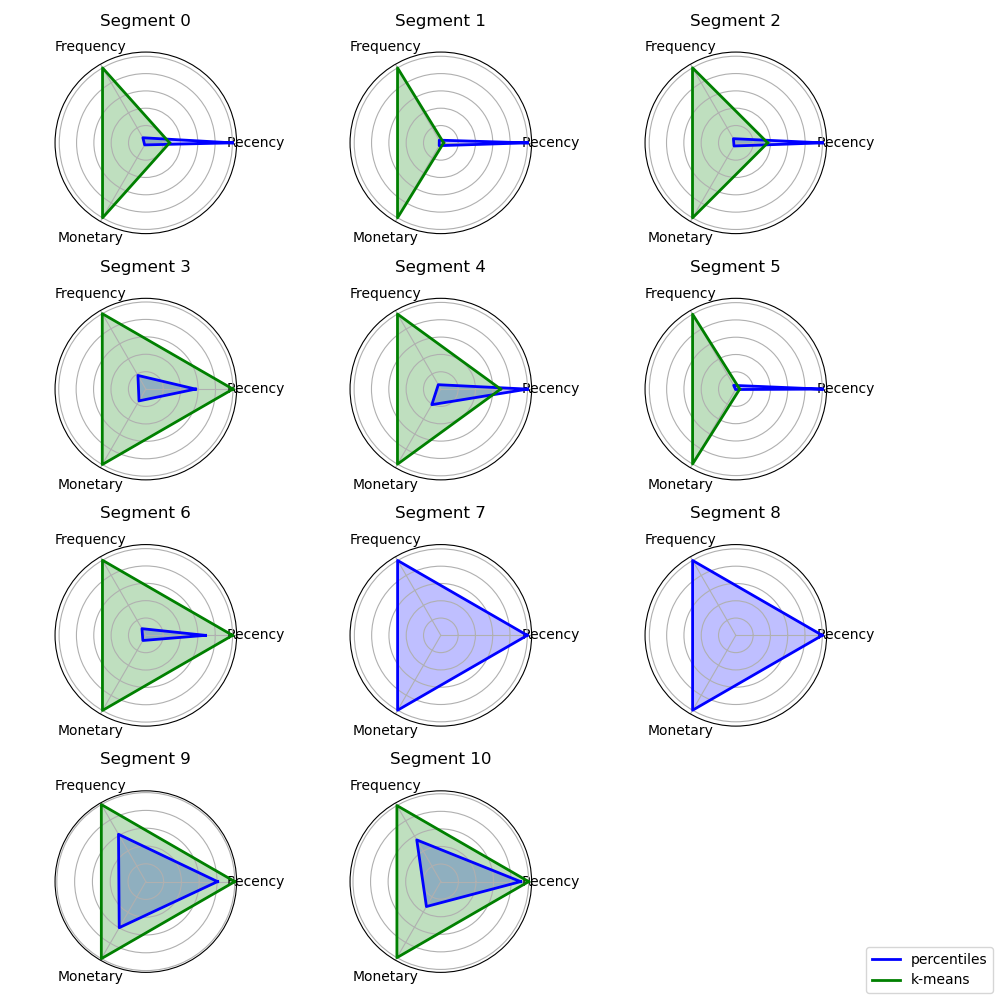

In [957]:
# Prepare the categories (columns) for the radar chart
categories = ['Recency', 'Frequency', 'Monetary']
title = 'percentiles vs kmeans'

# Create subplots for each segment (11 segments in total)
num_segments = len(grouped_df1)
rows = int(np.ceil(num_segments / 3))  # Adjust the number of rows based on the number of segments
fig, axes = plt.subplots(rows, 3, figsize=(10, 10), subplot_kw=dict(polar=True))

# Flatten the axes array if there are multiple rows
axes = axes.flatten()

# Plot a radar chart for each segment (comparing df1 and df2)
for i, segment_id in enumerate(grouped_df1.index):
    plot_radar_chart(axes[i], segments_vs_n[i].loc[0].values, segments_vs_n[i].loc[1].values, categories, f'Segment {segment_id}')

# Remove any empty subplots (if there are fewer than 11 segments)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a single legend for the entire figure
# We'll create a legend from the last axis but place it outside the plot
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right')

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space on the right for the legend
plt.show()

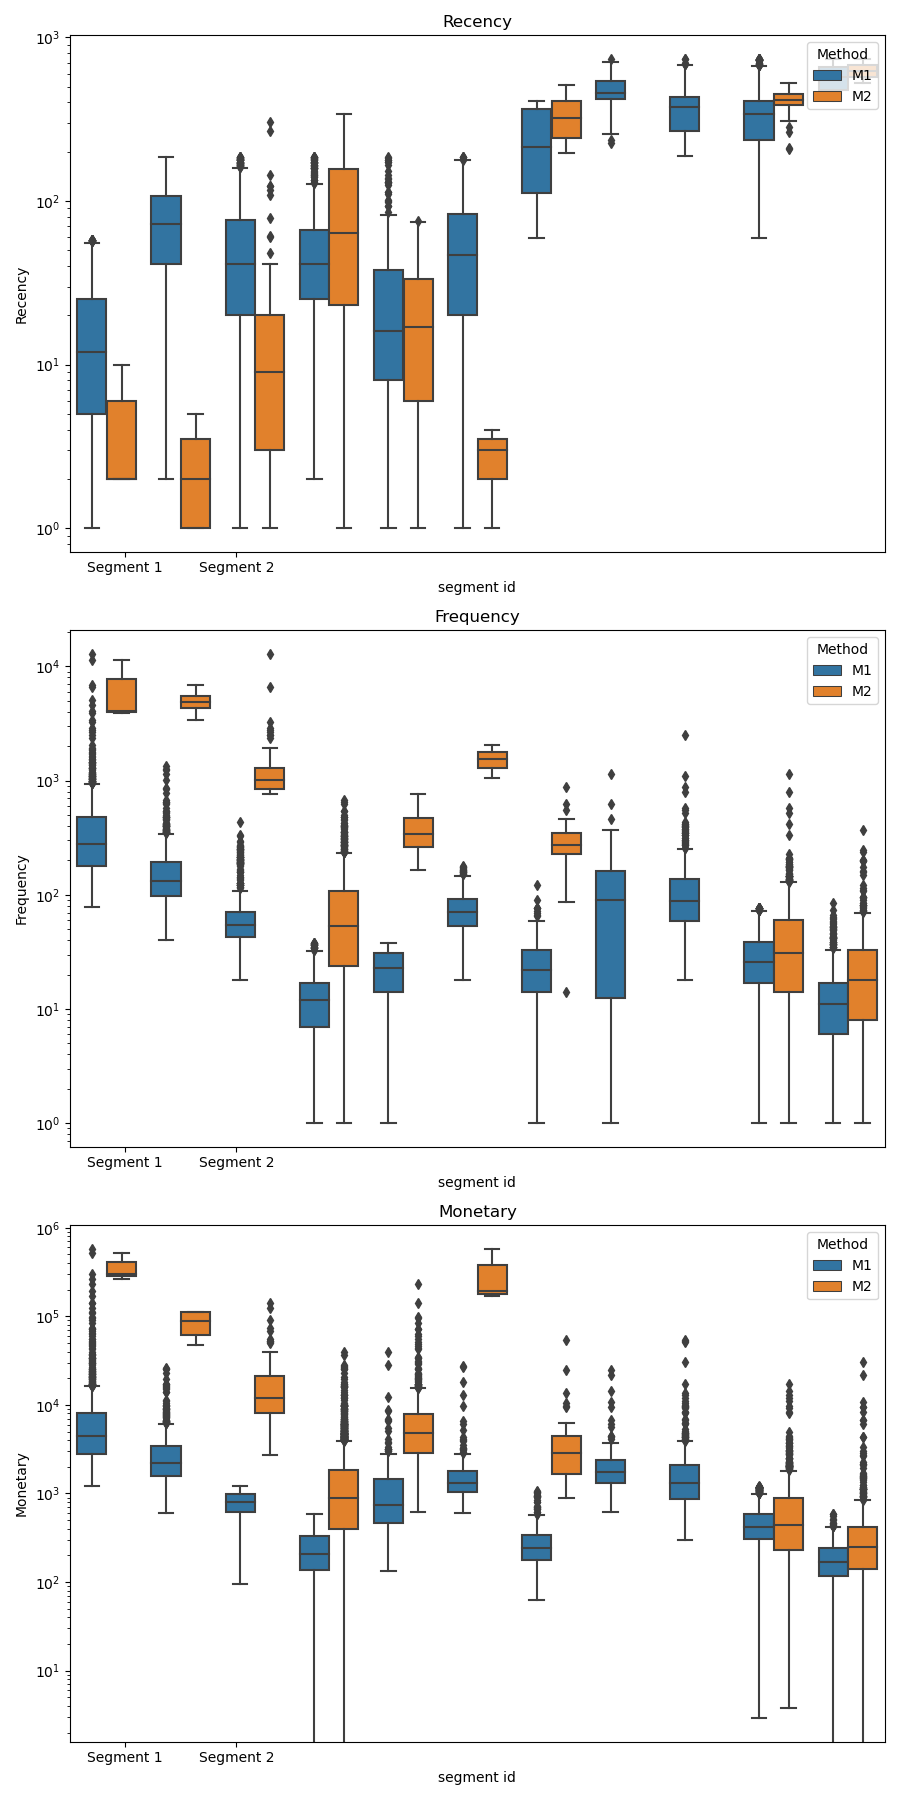

In [958]:
df_m1 = rfm_sc_perc.copy()
df_m2 = rfm_sc_km.copy()

#Combine M1 and M2 DataFrames for easier plotting
df_m1['Method'] = 'M1'
df_m2['Method'] = 'M2'
combined_df = pd.concat([df_m1, df_m2])

# Set up the figure and axes
fig, axes = plt.subplots(3, 1, figsize=(9, 18))

# Define metrics and titles for subplots
metrics = ['Recency', 'Frequency', 'Monetary']
titles = ['Recency', 'Frequency', 'Monetary']

# Create boxplots for each metric
for i, metric in enumerate(metrics):
    sns.boxplot(
        data=combined_df,
        x='segment id',
        y=metric,
        hue='Method',
        ax=axes[i],
        width=0.8  # Adjust the width of the boxplots
    )
    axes[i].set_title(titles[i])
    axes[i].set_yscale('log')
    axes[i].legend(title='Method', loc='upper right')
    axes[i].set_xticks([0.25, 1.75])  # Adjust x-ticks to increase space between segments
    axes[i].set_xticklabels([f'Segment {x}' for x in range(1, 3)])

plt.tight_layout()
plt.show()


In [959]:
import pandas as pd

# Assuming df_m1 is the DataFrame from method 1, and df_m2 is the DataFrame from method 2
# Also assuming the columns are: 'Customer ID', 'Recency', 'Frequency', 'Monetary', 'Score', 'segment id'

# Step 1: Merge both DataFrames on 'Customer ID'
df_combined = pd.merge(df_m1[['Customer ID', 'segment id']], 
                       df_m2[['Customer ID', 'segment id']], 
                       on='Customer ID', 
                       suffixes=('_m1', '_m2'))

# Step 2: Filter rows where segment ids are the same in both methods
df_same_segment = df_combined[df_combined['segment id_m1'] == df_combined['segment id_m2']]

# Step 3: Count the total number of customers in each segment for both methods
m1_segment_sizes = df_m1.groupby('segment id').size().reset_index(name='Size_m1')
m2_segment_sizes = df_m2.groupby('segment id').size().reset_index(name='Size_m2')

# Step 4: Count the number of common customers in each segment where both methods agree
common_counts = df_same_segment.groupby('segment id_m1').size().reset_index(name='Common Count')

# Step 5: Merge the common counts with the segment sizes of both m1 and m2
segment_counts = pd.merge(common_counts, m1_segment_sizes, left_on='segment id_m1', right_on='segment id', how='right')
segment_counts = pd.merge(segment_counts, m2_segment_sizes, on='segment id', how='right')

# Step 6: Fill NaN values with 0 for common counts
segment_counts['Common Count'] = segment_counts['Common Count'].fillna(0).astype(int)

# Step 7: Calculate the percentage of common customers relative to each method's segment size
segment_counts['Percentage_m1'] = ((segment_counts['Common Count'] / segment_counts['Size_m1']) * 100).round(2)
segment_counts['Percentage_m2'] = ((segment_counts['Common Count'] / segment_counts['Size_m2']) * 100).round(2)

# Step 8: Ensure all segments (1 to 11) are represented, even with 0 percentages
all_segments = pd.DataFrame({'segment id': range(1, rfm_sc_perc['segment id'].nunique())})  # Assuming segments are 1 to 11

# Merge to ensure all segments are present
segment_counts = pd.merge(all_segments, segment_counts, on='segment id', how='left')

# Fill NaN values with 0 for sizes and percentages
segment_counts[['Common Count', 'Size_m1', 'Size_m2']] = segment_counts[['Common Count', 'Size_m1', 'Size_m2']].fillna(0).astype(int)
segment_counts['Percentage_m1'] = segment_counts['Percentage_m1'].fillna(0)
segment_counts['Percentage_m2'] = segment_counts['Percentage_m2'].fillna(0)

# Final output: segment id, Common Count, and Percentages
print(segment_counts[['segment id', 'Common Count', 'Percentage_m1', 'Percentage_m2']])



   segment id  Common Count  Percentage_m1  Percentage_m2
0           1             0           0.00           0.00
1           2             0           0.00           0.00
2           3           397         100.00          11.82
3           4             0           0.00           0.00
4           5             0           0.00           0.00
5           6             0           0.00           0.00
6           7             0           0.00           0.00
7           8             0           0.00           0.00
8           9           429          37.86          42.69
9          10           380          63.33          63.33
